In [1]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Define n (number of samples) which is missing in the original code
n = 1000  # You can adjust this value based on your needs

# Generate synthetic data
age = np.random.randint(50, 90, n)
education_years = np.random.randint(5, 25, n)
physical_activity = np.random.choice([0, 1], n)  # 0 = No, 1 = Yes
sleep_hours = np.round(np.random.normal(6.5, 1.5, n), 1)
mmse_score = np.random.randint(10, 30, n)

# New features
marital_status = np.random.choice(['Married', 'Single', 'Cohabiting', 'Divorced'], n)
stress_level = np.random.choice(['Mild', 'Moderate', 'Moderately Severe', 'Severe'], n)
brain_injury = np.random.choice(['None', 'Accident', 'Violence'], n)

# Encode new features
marital_encoded = pd.Series(marital_status).map({'Single': 0, 'Married': 1, 'Cohabiting': 2, 'Divorced': 3})
stress_encoded = pd.Series(stress_level).map({'Mild': 0, 'Moderate': 1, 'Moderately Severe': 2, 'Severe': 3})
injury_encoded = pd.Series(brain_injury).map({'None': 0, 'Accident': 1, 'Violence': 2})

# Generate synthetic labels
risk_score = (
    (education_years < 10).astype(int)
    + (sleep_hours < 6).astype(int)
    + (mmse_score < 20).astype(int)
    + (physical_activity == 0).astype(int)
    + (stress_encoded >= 2).astype(int)
    + (injury_encoded >= 1).astype(int)
)
memory_loss = (risk_score >= 3).astype(int)

# DataFrame
df = pd.DataFrame({
    'age': age,
    'education_years': education_years,
    'physical_activity': physical_activity,
    'sleep_hours': sleep_hours,
    'mmse_score': mmse_score,
    'marital_status': marital_encoded,
    'stress_level': stress_encoded,
    'brain_injury': injury_encoded,
    'memory_loss': memory_loss
})

# Step 2: Train model
X = df.drop('memory_loss', axis=1)
y = df['memory_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 3: Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Step 4: Save model
joblib.dump(model, "alz_model_pipeline.pkl")
print("🧠 Extended memory model saved as alz_model_pipeline.pkl")








Accuracy: 0.97
ROC AUC: 0.9961119389085491
🧠 Extended memory model saved as alz_model_pipeline.pkl


In [3]:
# -------------------------------------------
# 0.  Install/Import packages (once)
# -------------------------------------------
# pip install pandas scikit-learn matplotlib seaborn joblib
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# -------------------------------------------
# 1.  Load data
# -------------------------------------------
alz_df = pd.read_csv(r"C:\Users\sibs2\Downloads\alzheimers_disease_data.csv")
# Preview the dataset
print(alz_df.head())

# Check datatypes
print(alz_df.dtypes)

# Filter only those that exist
intended_cols = ['Gender', 'MaritalStatus', 'Education', 'Occupation']  # Example list of categorical columns

categorical_cols = [col for col in intended_cols if col in alz_df.columns]

# Encode available categorical columns
alz_df_encoded = pd.get_dummies(alz_df, columns=categorical_cols)

# Confirm
print("Encoded DataFrame shape:", alz_df_encoded.shape)

# One-hot encode categorical columns
alz_df_encoded = pd.get_dummies(alz_df, columns=categorical_cols)

# Check for pollution columns
pollution_cols = ['pollution_level Air', 'pollution_level water', 'pollution_level enviromental']

# Ensure all exist before summing
existing_pollution_cols = [col for col in pollution_cols if col in alz_df.columns]

# Create total pollution score
alz_df['pollution_score'] = alz_df[existing_pollution_cols].sum(axis=1)

# Optional: drop the individual columns
alz_df.drop(columns=existing_pollution_cols, inplace=True)


# Bin the pollution score into categories
alz_df['pollution_category'] = pd.cut(
    alz_df['pollution_score'],
    bins=[-1, 5, 15, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

# One-hot encode this new pollution category
alz_df = pd.get_dummies(alz_df, columns=['pollution_category'])

# Check result
print(alz_df.filter(like='pollution_category').head())

# Check result
print(alz_df[['pollution_score']].head())

# Check final shape
print("Final encoded data shape:", alz_df_encoded.shape)
# Show result
print(alz_df_encoded.head())
alz_df_encoded.to_csv("alzheimers_cleaned.csv", index=False)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
   Age  Gender  EducationLevel        BMI  Smoking  AlcoholConsumption  \
0   73       0               2  22.927749        0           13.297218   
1   89       0               0  26.827681        0            4.542524   
2   73       0               1  17.795882        0           19.555085   
3   74       1               1  33.800817        1           12.209266   
4   89       0               0  20.716974        0           18.454356   

   PhysicalActivity  DietQuality  SleepQuality  FamilyHistoryAlzheimers  ...  \
0          6.327112     1.347214      9.025679                        0  ...   
1          7.619885     0.518767      7.151293                        0  ...   
2          7.844988     1.826335      9.673574                        1  ...   
3          8.428001     7.435604      8.392554                        0  ...   
4          

In [4]:
print(alz_df.columns.tolist())


['Age', 'Gender', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'pollution_score', 'pollution_category_Low', 'pollution_category_Moderate', 'pollution_category_High']


In [5]:
alz_df.shape


(2149, 36)

In [6]:
alz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          2149 non-null   int64  
 1   Gender                       2149 non-null   int64  
 2   EducationLevel               2149 non-null   int64  
 3   BMI                          2149 non-null   float64
 4   Smoking                      2149 non-null   int64  
 5   AlcoholConsumption           2149 non-null   float64
 6   PhysicalActivity             2149 non-null   float64
 7   DietQuality                  2149 non-null   float64
 8   SleepQuality                 2149 non-null   float64
 9   FamilyHistoryAlzheimers      2149 non-null   int64  
 10  CardiovascularDisease        2149 non-null   int64  
 11  Diabetes                     2149 non-null   int64  
 12  Depression                   2149 non-null   int64  
 13  HeadInjury        

In [6]:
alz_df.describe()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,pollution_score
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.0
mean,74.908795,0.506282,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,...,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653,0.0
std,8.990221,0.500077,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,...,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214,0.0
min,60.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,...,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,67.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,...,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,75.000000,1.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,...,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,83.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,...,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,90.000000,1.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,...,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [7]:
alz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          2149 non-null   int64  
 1   Gender                       2149 non-null   int64  
 2   EducationLevel               2149 non-null   int64  
 3   BMI                          2149 non-null   float64
 4   Smoking                      2149 non-null   int64  
 5   AlcoholConsumption           2149 non-null   float64
 6   PhysicalActivity             2149 non-null   float64
 7   DietQuality                  2149 non-null   float64
 8   SleepQuality                 2149 non-null   float64
 9   FamilyHistoryAlzheimers      2149 non-null   int64  
 10  CardiovascularDisease        2149 non-null   int64  
 11  Diabetes                     2149 non-null   int64  
 12  Depression                   2149 non-null   int64  
 13  HeadInjury        

In [7]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    plt.show()



def sense_spec(y_test, y_pred, name, probs, probs1):
    conf_mat = confusion_matrix(y_test, y_pred)
    total_sample= sum(sum(conf_mat))
    accu=(conf_mat[0,0]+conf_mat[1,1])/total_sample
    sense = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    spec = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    ppv =  conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
    npv =  conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])

    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs1)
    probs = probs[:, 1]
    auc = sk.metrics.roc_auc_score(y_test, probs)
    print("\n\nAcc / ppv / npv / Sens / Spec /AUC for /", name, " : \n",  round(accu*100,4), "/", round(ppv*100,4), "/", round(npv*100,4), "/", round(sense*100,4),"/", round(spec*100,4), "/", round(auc*100,4))
    return auc, sense,spec, accu, fpr, tpr,ppv,npv
    #sens = TP/(TP+FN),    Spec= TN/(TN+FP)


Minimum:60.00
Mean:74.91
Median:75.00
Mode:68.00
Maximum:90.00



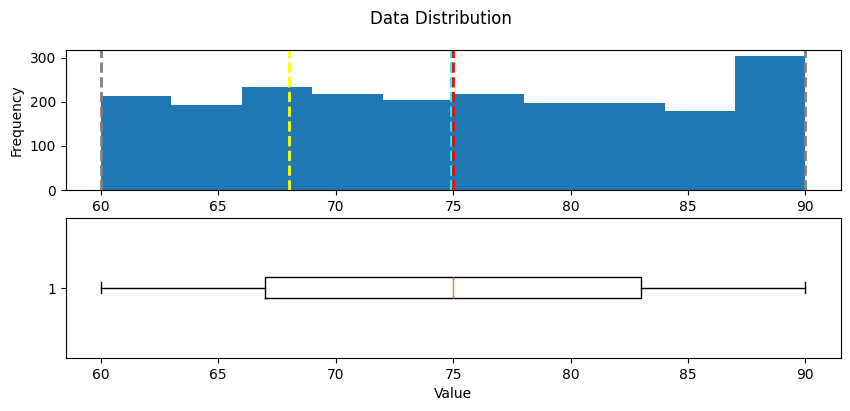

In [9]:
show_distribution(alz_df['Age'])

(array([212., 192., 234., 217., 203., 217., 197., 196., 178., 303.]),
 array([60., 63., 66., 69., 72., 75., 78., 81., 84., 87., 90.]),
 <BarContainer object of 10 artists>)

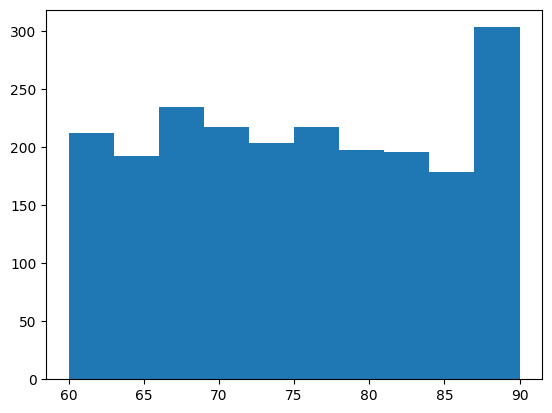

In [10]:
plt.hist(alz_df["Age"])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression





#Here, I am building 7 models, these are
"""""
1. Nearest Neigbour
2. Support Vector Machine
3. Gaussian Process
4. Decision Tree
5. Random Forest
6. AdaBoost
7. Logistic Regression
"""""

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    LogisticRegression()
]
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Logistic Regression"
]


In [12]:
import warnings  # Add this import at the beginning of your code

# Define the cal_accuracy function
def cal_accuracy(y_true, y_pred, model_name):
    """
    Calculate and print accuracy metrics for a model
    
    Parameters:
    y_true: actual target values
    y_pred: predicted target values
    model_name: name of the model being evaluated
    """
    # Add your accuracy calculation code here
    # For example:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # You can add more metrics as needed
    # precision = precision_score(y_true, y_pred)
    # recall = recall_score(y_true, y_pred)
    # f1 = f1_score(y_true, y_pred)

clf_score=[]
xx = []
yy = []
all_ = ''
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        clf_score.append([score,name])
        xx.append(name)
        yy.append(score*100)
        y_pred = clf.predict(X_test)
        cal_accuracy(y_test, y_pred, name)

Nearest Neighbors Accuracy: 0.8400
Linear SVM Accuracy: 0.9200
Gaussian Process Accuracy: 1.0000
Decision Tree Accuracy: 0.9200
Random Forest Accuracy: 0.7600
AdaBoost Accuracy: 0.9200
Logistic Regression Accuracy: 1.0000


In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

probs = clf.predict_proba(X_test)[:, 1]
clf = SVC(kernel='linear', C=0.025, probability=True)

# Accuracy
score = model.score(X_test, y_test)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_mat.ravel()  # Unpack confusion matrix

# Performance Metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Recall
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
ppv = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision or Positive Predictive Value
npv = TN / (TN + FN) if (TN + FN) != 0 else 0
auc = roc_auc_score(y_test, probs)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"PPV (Precision): {ppv:.4f}")
print(f"NPV: {npv:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 1.0000
Sensitivity (Recall): 1.0000
Specificity: 1.0000
PPV (Precision): 1.0000
NPV: 1.0000
AUC: 1.0000


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# First, list all columns
print(alz_df.columns)



Index(['Age', 'Gender', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'pollution_score',
       'pollution_category_Low', 'pollution_category_Moderate',
       'pollution_category_High'],
      dtype='object')


In [ ]:
# Load your encoded Alzheimer’s dataset
alz_df = pd.read_csv(r"C:\Users\sibs2\Downloads\alzheimers_cleaned.csv")

# Define X (features) and y (target)
# You can choose your target variable,
X = alz_df.drop("Diagnosis", axis=1)  # Replace 'target_column_name' with the actual name
y = alz_df["Diagnosis"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9

Confusion Matrix:
 [[11  2]
 [ 0  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



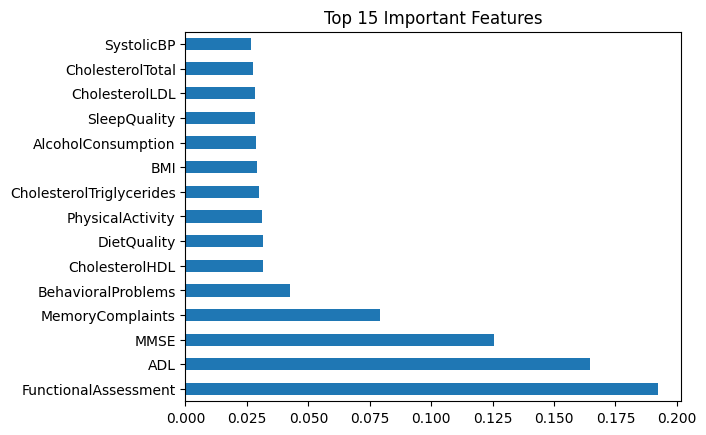

In [ ]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Important Features")
plt.show()


In [18]:
from sklearn.pipeline import Pipeline

alz_pipeline = Pipeline(steps=[
    ('preprocessor', alz_df),  # your preprocessing steps
    ('classifier', alz_df)            # your trained model
])


In [19]:
type(alz_df)


pandas.core.frame.DataFrame

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Example columns (customize based on your Alzheimer dataset)
numerical_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
]

categorical_features = [
    'Gender', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]
target = 'Diagnosis'


# Pipelines for numeric and categorical
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

alz_preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])


In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pickle


In [24]:
numerical_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
]

categorical_features = [
    'Gender', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

target = 'Diagnosis'


In [25]:
# Numerical: Impute missing with mean, then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical: Impute missing with most frequent (mode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


In [26]:
import pandas as pd

df = pd.read_csv(r"C:\Users\sibs2\Downloads\alzheimers_disease_data.csv")  # or read_excel(), read_json(), etc.
print(df.head())         # Shows the first 5 rows
print(df.columns)        # Lists all column names
print(df.shape)          # (rows, columns)
print(df.info())         # Summary: columns, data types, non-null counts


   Age  Gender  EducationLevel        BMI  Smoking  AlcoholConsumption  \
0   73       0               2  22.927749        0           13.297218   
1   89       0               0  26.827681        0            4.542524   
2   73       0               1  17.795882        0           19.555085   
3   74       1               1  33.800817        1           12.209266   
4   89       0               0  20.716974        0           18.454356   

   PhysicalActivity  DietQuality  SleepQuality  FamilyHistoryAlzheimers  ...  \
0          6.327112     1.347214      9.025679                        0  ...   
1          7.619885     0.518767      7.151293                        0  ...   
2          7.844988     1.826335      9.673574                        1  ...   
3          8.428001     7.435604      8.392554                        0  ...   
4          6.310461     0.795498      5.597238                        0  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \

In [ ]:
type(df)


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define actual features
numeric_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

categorical_features = [
    'Gender', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Full pipeline
alz_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data
X = alz_df.drop(columns='Diagnosis')
y = alz_df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit pipeline
alz_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BMI',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', 'SystolicBP',
                                                   'DiastolicBP',
                                                   'CholesterolTotal',
                                                   'CholesterolLDL',
                                                   'CholesterolHDL',
                                                   'CholesterolTriglycerides',
                                                   'MMSE',
                                                   'FunctionalAssessment',
                                                   'ADL']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'EducationLevel',
                                                   'Smoking',
                                                   'FamilyHistoryAlzheimers',
                                                   'CardiovascularDisease',
                                                   'Diabetes', 'Depression',
                                                   'HeadInjury', 'Hypertension',
                                                   'MemoryComplaints',
                                                   'BehavioralProblems',
                                                   'Confusion',
                                                   'Disorientation',
                                                   'PersonalityChanges',
                                                   'DifficultyCompletingTasks',
                                                   'Forgetfulness'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
X = alz_df.drop(columns="Diagnosis")
y = alz_df["Diagnosis"]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit your pipeline
alz_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BMI',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', 'SystolicBP',
                                                   'DiastolicBP',
                                                   'CholesterolTotal',
                                                   'CholesterolLDL',
                                                   'CholesterolHDL',
                                                   'CholesterolTriglycerides',
                                                   'MMSE',
                                                   'FunctionalAssessment',
                                                   'ADL']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'EducationLevel',
                                                   'Smoking',
                                                   'FamilyHistoryAlzheimers',
                                                   'CardiovascularDisease',
                                                   'Diabetes', 'Depression',
                                                   'HeadInjury', 'Hypertension',
                                                   'MemoryComplaints',
                                                   'BehavioralProblems',
                                                   'Confusion',
                                                   'Disorientation',
                                                   'PersonalityChanges',
                                                   'DifficultyCompletingTasks',
                                                   'Forgetfulness'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


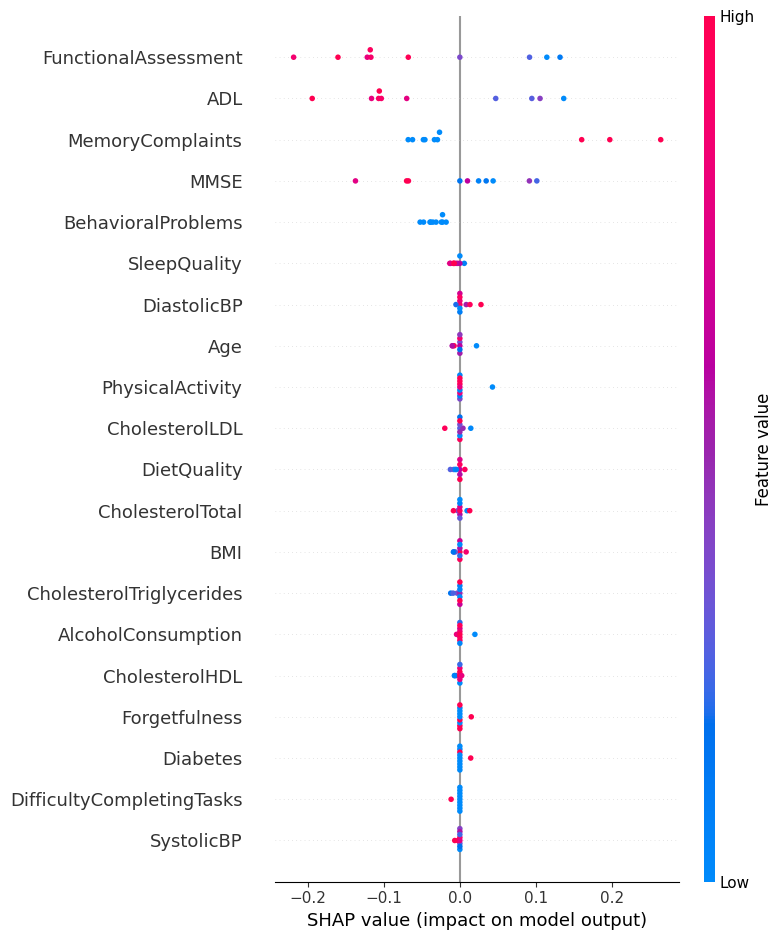

In [29]:
import pandas as pd
import shap
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features BEFORE using them
numeric_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

categorical_features = [
    'Gender', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

# Define transformers with imputation and scaling/encoding
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Full pipeline with classifier
alz_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Load your data
alz_df = pd.read_csv(r"C:\Users\sibs2\Downloads\alzheimers_disease_data.csv")

# Define X and y
X = alz_df.drop('Diagnosis', axis=1)
y = alz_df['Diagnosis']

# Split dataset once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
alz_pipeline.fit(X_train, y_train)

# Save feature names before conversion
feature_names = X_train.columns

# Define SHAP model prediction wrapper
def model_predict(x):
    x_df = pd.DataFrame(x, columns=feature_names)
    return alz_pipeline.predict_proba(x_df)[:, 1]

# Sample background data for SHAP (use 100 samples or less)
background_data = shap.sample(X_train, 100)
background_numpy = background_data.values if hasattr(background_data, 'values') else background_data

# Sample data to explain
sample_input = X_test.iloc[:10]
sample_numpy = sample_input.values if hasattr(sample_input, 'values') else sample_input

# Create SHAP explainer and compute SHAP values
explainer = shap.KernelExplainer(model_predict, background_numpy)
shap_values = explainer.shap_values(sample_numpy)

# Plot summary
shap.summary_plot(shap_values, sample_input)


In [30]:
X = alz_df.drop(columns="Diagnosis")
y = alz_df["Diagnosis"]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit your pipeline
alz_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', 'SystolicBP',
                                                   'DiastolicBP',
                                                   'CholesterolTotal',
                                                   'CholesterolLDL',
                                                   'CholesterolHDL',
                                                   'CholesterolTriglycerides',
                                                   'MMSE',
                                                   'Function...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'EducationLevel',
                                                   'Smoking',
                                                   'FamilyHistoryAlzheimers',
                                                   'CardiovascularDisease',
                                                   'Diabetes', 'Depression',
                                                   'HeadInjury', 'Hypertension',
                                                   'MemoryComplaints',
                                                   'BehavioralProblems',
                                                   'Confusion',
                                                   'Disorientation',
                                                   'PersonalityChanges',
                                                   'DifficultyCompletingTasks',
                                                   'Forgetfulness'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [31]:
import pickle  # Import the pickle module at the top of your script

with open('alz_model_pipeline.pkl', 'wb') as f:
    pickle.dump(alz_pipeline, f)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = alz_pipeline.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.9465116279069767

Confusion Matrix:
[[272   5]
 [ 18 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.88      0.92       153

    accuracy                           0.95       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.95      0.95      0.95       430



In [33]:
import joblib

# Save the model
joblib.dump(alz_pipeline, 'alz_model_pipeline.joblib')


['alz_model_pipeline.joblib']

In [34]:
import joblib

# Save the model
joblib.dump(alz_pipeline, 'alz_model_pipeline.pkl')


['alz_model_pipeline.pkl']

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(alz_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [36]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       277
           1       0.96      0.87      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430

ROC AUC Score: 0.9490101696514948


In [37]:
import joblib

# Save the model
joblib.dump(alz_pipeline, 'alz_model_pipeline.pkl')

['alz_model_pipeline.pkl']

In [2]:
import joblib
import cloudpickle

# Load your old model
alz_model = joblib.load("alz_model_pipeline.pkl")

# Save with cloudpickle
with open("stroke_model_pipeline_cp.pkl", "wb") as f:
    cloudpickle.dump(alz_model, f)


In [5]:
# convert_old_model.py
import joblib
import cloudpickle

# Path to your old model
old_model_path = "alz_model_pipeline.pkl"

# Path to save the new version-compatible model
new_model_path = "alz_model_pipeline_cloud.pkl"

# Step 1: Load old model using joblib (in old scikit-learn environment if needed)
try:
    model = joblib.load(old_model_path)
except AttributeError as e:
    print("Old version dependency detected:", e)
    print("Make sure to load in the original scikit-learn version first.")
    raise

# Step 2: Save using cloudpickle for version-independent usage
with open(new_model_path, "wb") as f:
    cloudpickle.dump(model, f)

print(f"Model saved as {new_model_path}")

# Step 3: Load in any new environment
# import cloudpickle
# with open(new_model_path, "rb") as f:
#     model = cloudpickle.load(f)


Model saved as alz_model_pipeline_cloud.pkl


In [7]:
import joblib, cloudpickle

# Load with old sklearn
model = joblib.load(r"C:\Users\sibs2\african-neurohealth-dashboard\alz_model_pipeline.pkl")

# Save in a forward-compatible format
with open(r"C:\Users\sibs2\african-neurohealth-dashboard\alz_model_portable.pkl", "wb") as f:
    cloudpickle.dump(model, f)

100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


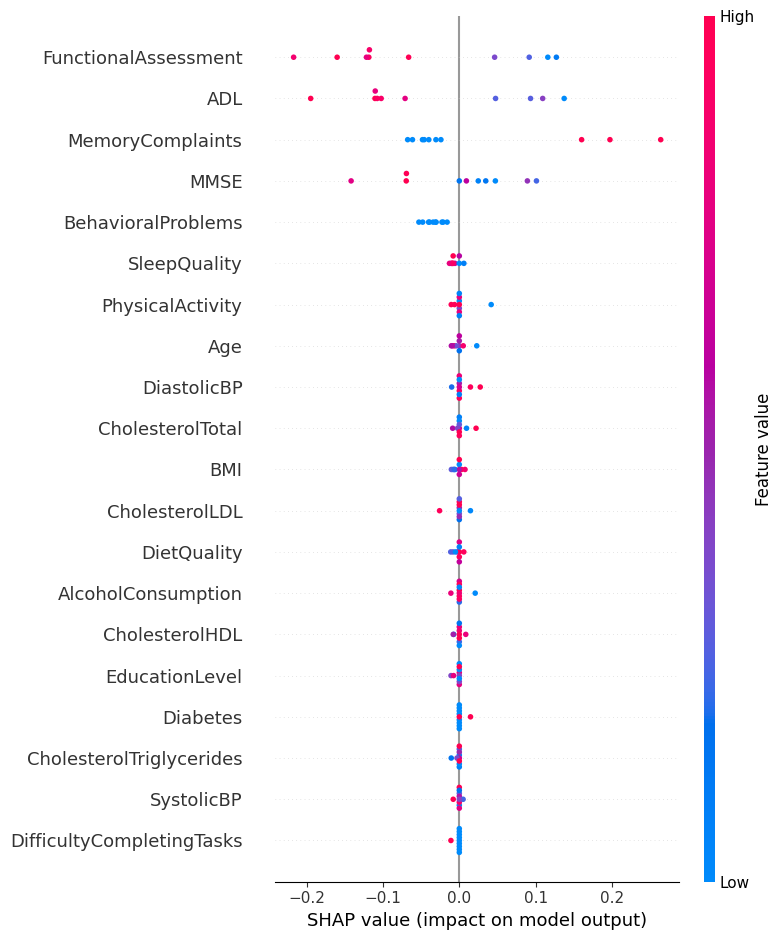

NameError: name 'model' is not defined

In [4]:
import joblib, cloudpickle
import pandas as pd
import shap
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features BEFORE using them
numeric_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

categorical_features = [
    'Gender', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

# Define transformers with imputation and scaling/encoding
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Full pipeline with classifier
alz_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Load your data
alz_df = pd.read_csv(r"C:\Users\sibs2\Downloads\alzheimers_disease_data.csv")

# Define X and y
X = alz_df.drop('Diagnosis', axis=1)
y = alz_df['Diagnosis']

# Split dataset once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
alz_pipeline.fit(X_train, y_train)

# Save feature names before conversion
feature_names = X_train.columns

# Define SHAP model prediction wrapper
def model_predict(x):
    x_df = pd.DataFrame(x, columns=feature_names)
    return alz_pipeline.predict_proba(x_df)[:, 1]

# Sample background data for SHAP (use 100 samples or less)
background_data = shap.sample(X_train, 100)
background_numpy = background_data.values if hasattr(background_data, 'values') else background_data

# Sample data to explain
sample_input = X_test.iloc[:10]
sample_numpy = sample_input.values if hasattr(sample_input, 'values') else sample_input

# Create SHAP explainer and compute SHAP values
explainer = shap.KernelExplainer(model_predict, background_numpy)
shap_values = explainer.shap_values(sample_numpy)

# Plot summary
shap.summary_plot(shap_values, sample_input)

joblib.dump(model, "alz_latest.joblib")

from sklearn.externals import joblib  # for older versions
# or
import joblib  # for newer versions

# Assuming `model` is your trained scikit-learn model
joblib.dump(model, "alz_latest.joblib")


In [1]:
import sklearn
print(sklearn.__version__)


1.6.1


<Figure size 640x480 with 0 Axes>

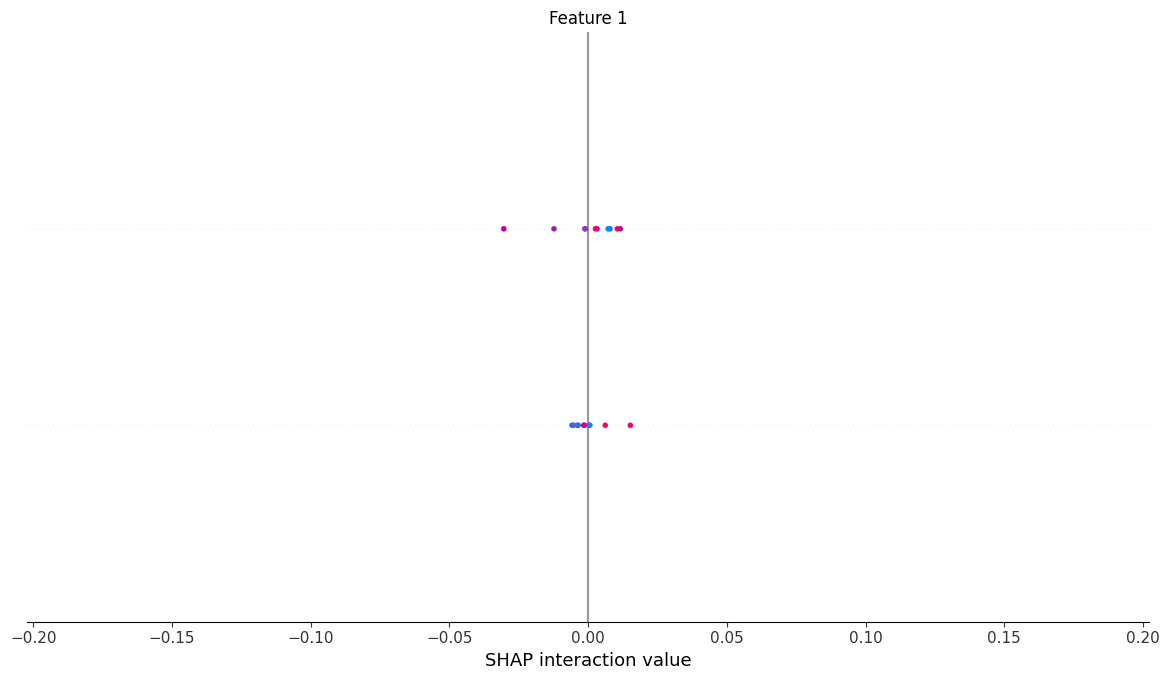

['shap_tree_explainer.joblib']

In [2]:
import joblib
import pandas as pd
import shap
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features
numeric_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
]

categorical_features = [
    'Gender', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Load data
alz_df = pd.read_csv(r"C:\Users\sibs2\Downloads\alzheimers_disease_data.csv")
X = alz_df.drop('Diagnosis', axis=1)
y = alz_df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess manually
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_preprocessed, y_train)

# ✅ Save preprocessor and model
joblib.dump(preprocessor, "alz_preprocessor.joblib")
joblib.dump(model, "alz_model.joblib")

# ✅ SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_preprocessed[:10])

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_preprocessed[:10])

# ✅ Optional: Save explainer (TreeExplainer is serializable)
joblib.dump(explainer, "shap_tree_explainer.joblib")

<Figure size 640x480 with 0 Axes>

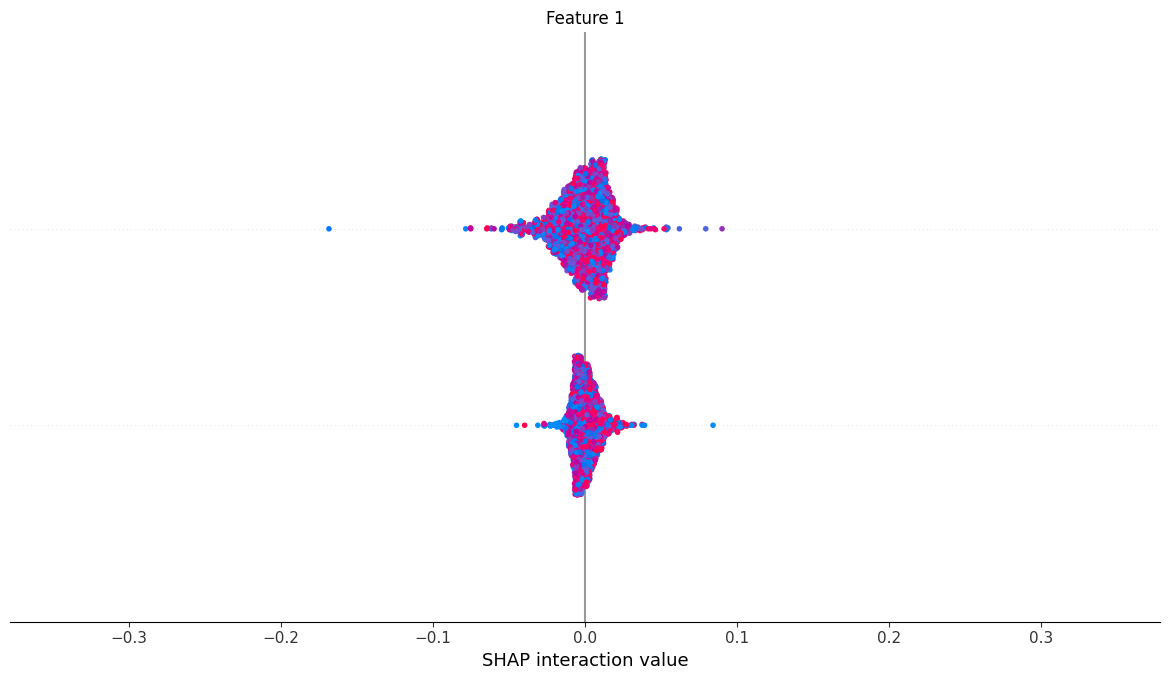

In [8]:
# Reload everything
preprocessor = joblib.load("alz_preprocessor.joblib")
model = joblib.load("alz_model.joblib")
explainer = joblib.load("shap_tree_explainer.joblib")

# Transform new data
new_data = pd.read_csv(r"C:\Users\sibs2\Downloads\alzheimers_disease_data.csv")
new_preprocessed = preprocessor.transform(new_data)

# Explain predictions
shap_values = explainer.shap_values(new_preprocessed)
shap.summary_plot(shap_values, new_preprocessed)